# 0. Librerías básicas

In [2]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

## a) Detección de rostros

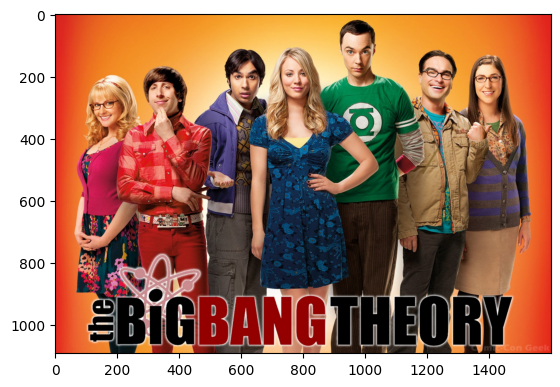

In [6]:
#Mostramos la imagen original
img = cv.imread('figuras/bbt.jpeg')
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

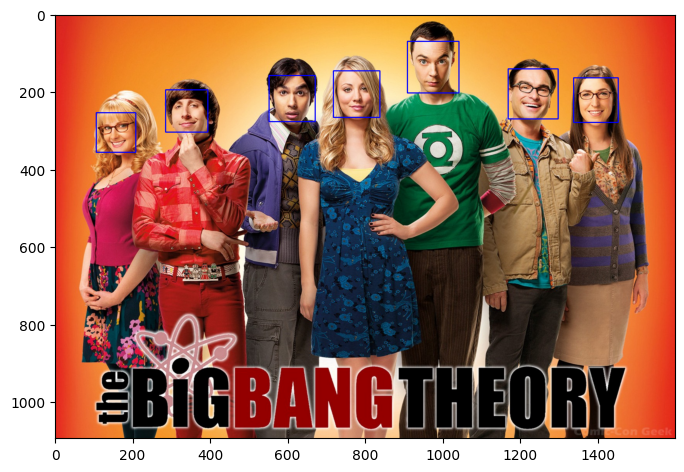

In [8]:
# Rostros
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

detector_rostros = cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')
faces = detector_rostros.detectMultiScale(img_gray, 1.05, 20)

for (x,y,w,h) in faces:  
    cv.rectangle( img , (x,y),(x+w, y+h), (0,0,255),2 )
plt.figure(figsize=(8,8))
plt.imshow(img)

plt.show()

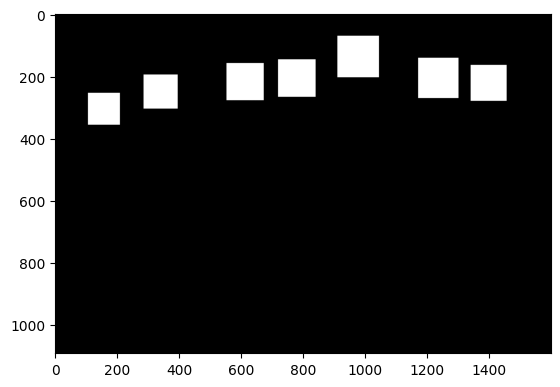

In [9]:
# mascara
mascara=np.zeros((img.shape[0],img.shape[1]),dtype='uint8')
for (x,y,w,h) in faces:  
    cv.rectangle( mascara , (x,y),(x+w, y+h), 255,-1 )

plt.imshow(mascara, cmap='gray')
plt.show()

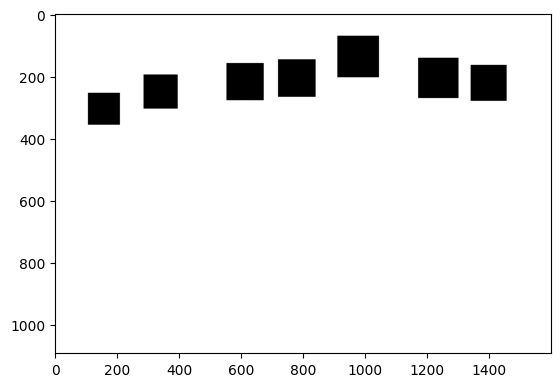

In [10]:
# mascara inversa
mascara_inv=cv.bitwise_not(mascara)
plt.imshow(mascara_inv, cmap='gray')
plt.show()

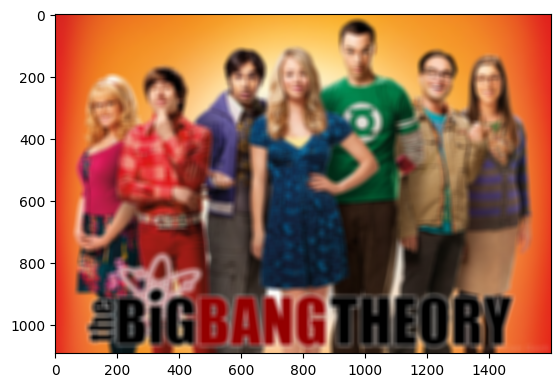

In [11]:
#Mostramos la imagen original con difuminado
img = cv.imread('figuras/bbt.jpeg')
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_blur=cv.blur(img, (20,20))
plt.imshow(img_blur)
plt.show()

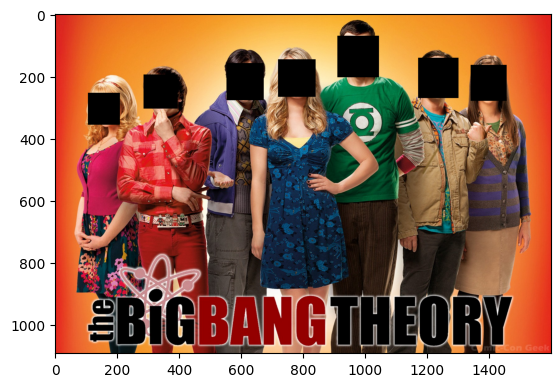

In [12]:
# Imagen 1
img_mascara = cv.bitwise_and(  img,img, mask= mascara_inv )
plt.imshow(img_mascara)
plt.show()

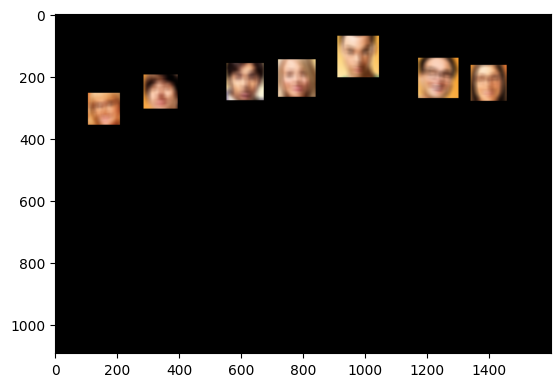

In [13]:
# Imagen 2
img_mascara_blur = cv.bitwise_and(  img_blur,img_blur, mask= mascara)
plt.imshow(img_mascara_blur)
plt.show()

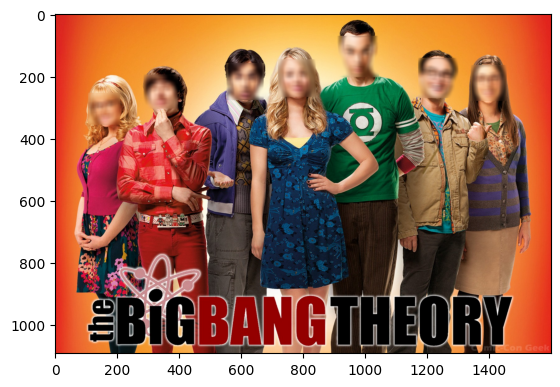

In [14]:
# Imagen Final
img_add=cv.add(img_mascara, img_mascara_blur)
plt.imshow(img_add)
plt.show()

# 1. Reproducir  el video

In [15]:
video = cv.VideoCapture(0)
detector_rostros = cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')

while(video.isOpened()):
    ret, frame = video.read()
    #ret es una  variable booleana, true -> existe imagen , false -> No existe (final de video)
    if ret:
        #cv.imshow("video original", frame)
        img = frame.copy()
        img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
        img_blur=cv.blur(img, (25,25))
        
        faces = detector_rostros.detectMultiScale(img_gray, 1.1, 20)
        mascara=np.zeros((img.shape[0],img.shape[1]),dtype='uint8')
        for (x,y,w,h) in faces:  
            cv.rectangle( mascara , (x,y),(x+w, y+h), 255,-1 )
        mascara_inv=cv.bitwise_not(mascara)
        img_mascara = cv.bitwise_and(  img,img, mask= mascara_inv )
        img_mascara_blur = cv.bitwise_and(  img_blur,img_blur, mask= mascara)
        img_add=cv.add(img_mascara, img_mascara_blur)

        cv.imshow("Video",img_add)
        
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
video.release()
cv.destroyAllWindows()

KeyboardInterrupt: 

In [3]:
video = cv.VideoCapture("videos/video_ejemplo.mp4")
fraccion=0.5

while(video.isOpened()):
    ret, frame = video.read()
    #ret es una  variable booleana, true -> existe imagen , false -> No existe (final de video)
    if ret:
        #cv.imshow("video original", frame)  
        img = frame.copy()
        columnas= int(fraccion*(img.shape[1]))
        filas=int(fraccion*(img.shape[0]))
        frame=cv.resize(img, (columnas, filas), cv.INTER_NEAREST )
        cv.imshow("video con resize", frame)  
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
video.release()
cv.destroyAllWindows()